In [1]:
import pandas as pd
import sys, os
basedir = "../data/processed"
df = pd.read_csv(os.path.join(basedir,"nyctaxiclean.csv"))

/Users/tdm/git/capstone/venv/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
df.describe()

,Unnamed: 0,rate_code,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount
count,1.510177e+07,1.510177e+07,1.510177e+07,1.510177e+07,1.510177e+07,1.510177e+07,1.510177e+07,1.510163e+07,1.510163e+07,1.510177e+07,1.510177e+07,1.510177e+07,1.510177e+07,1.510177e+07,1.510177e+07
mean,7.550886e+06,1.033288e+00,1.709036e+00,7.466061e+02,2.863099e+00,-7.273243e+01,4.006760e+01,-7.269006e+01,4.004656e+01,1.227529e+01,3.266791e-01,4.983177e-01,1.345713e+00,2.447309e-01,1.469073e+01
std,4.359506e+06,3.452165e-01,1.385628e+00,5.505067e+02,3.344894e+00,9.738297e+00,6.959425e+00,9.867673e+00,6.981416e+00,9.962123e+00,3.673146e-01,2.895392e-02,2.132228e+00,1.186218e+00,1.194378e+01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-2.323420e+03,-3.481141e+03,-2.771290e+03,-3.547898e+03,2.500000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.500000e+00
25%,3.775443e+06,1.000000e+00,1.000000e+00,3.600000e+02,1.040000e+00,-7.399213e+01,4.073512e+01,-7.399143e+01,4.073416e+01,6.500000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,8.000000e+00
50%,7.550886e+06,1.000000e+00,1.000000e+00,6.000000e+02,1.780000e+00,-7.398172e+01,4.075281e+01,-7.398006e+01,4.075333e+01,9.500000e+00,0.000000e+00,5.000000e-01,1.000000e+00,0.000000e+00,1.100000e+01
75%,1.132633e+07,1.000000e+00,2.000000e+00,9.600000e+02,3.200000e+00,-7.396676e+01,4.076754e+01,-7.396362e+01,4.076832e+01,1.400000e+01,5.000000e-01,5.000000e-01,2.000000e+00,0.000000e+00,1.650000e+01
max,1.510177e+07,2.100000e+02,9.000000e+00,1.080000e+04,1.000000e+02,2.228722e+03,3.210393e+03,2.228746e+03,3.577126e+03,5.000000e+02,1.500000e+01,5.000000e-01,2.000000e+02,2.000000e+01,6.281000e+02


Text(0.5,1,'Histogram of passenger number density')

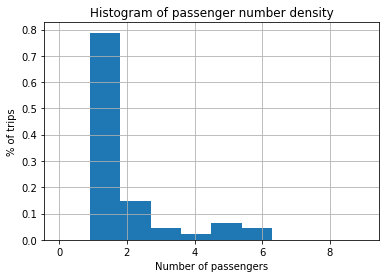

In [32]:
#examine passenger_count
import matplotlib.pyplot as plt
df.hist(column="passenger_count", density=True)
plt.xlabel("Number of passengers")
plt.ylabel("% of trips")
plt.title("Histogram of passenger number density")

In [28]:
# min is 0? max is nine... examine the outliers
primary_key = ["medallion", "hack_license", "pickup_datetime"]
passenger_counts = df.groupby(["passenger_count"]).count()
passenger_counts

,Unnamed: 0,medallion,hack_license,vendor_id_x,rate_code,store_and_fwd_flag,pickup_datetime,dropoff_datetime,trip_time_in_secs,trip_distance,...,dropoff_longitude,dropoff_latitude,vendor_id_y,payment_type,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount
passenger_count,,,,,,,,,,,,,,,,,,,,,
0,229,229,229,229,229,46,229,229,229,229,...,83,83,229,229,229,229,229,229,229,229
1,10707975,10707975,10707975,10707975,10707975,6112968,10707975,10707975,10707975,10707975,...,10707975,10707975,10707975,10707975,10707975,10707975,10707975,10707975,10707975,10707975
2,1985916,1985916,1985916,1985916,1985916,1056614,1985916,1985916,1985916,1985916,...,1985916,1985916,1985916,1985916,1985916,1985916,1985916,1985916,1985916,1985916
3,609900,609900,609900,609900,609900,267654,609900,609900,609900,609900,...,609900,609900,609900,609900,609900,609900,609900,609900,609900,609900
4,298178,298178,298178,298178,298178,140523,298178,298178,298178,298178,...,298178,298178,298178,298178,298178,298178,298178,298178,298178,298178
5,890196,890196,890196,890196,890196,4091,890196,890196,890196,890196,...,890196,890196,890196,890196,890196,890196,890196,890196,890196,890196
6,609376,609376,609376,609376,609376,164,609376,609376,609376,609376,...,609376,609376,609376,609376,609376,609376,609376,609376,609376,609376
8,1,1,1,1,1,0,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
9,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [27]:
#dig in to the zero passenger trips
df[df["passenger_count"]==0].describe()

#seems to be incomplete data - also time, distance, and in some cases latitude and longitude missing for these trips

,Unnamed: 0,rate_code,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount
count,2.290000e+02,229.000000,229.0,229.000000,229.000000,229.000000,229.000000,83.000000,83.000000,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000
mean,7.311074e+06,1.611354,0.0,175.834061,1.545939,-65.248092,35.939821,-52.598645,28.971007,28.003930,0.015284,0.026201,1.387686,0.781921,30.215022
std,2.815684e+06,2.296460,0.0,643.958821,4.937045,23.907089,13.168442,33.751169,18.589908,27.059704,0.098152,0.111662,3.880806,2.489266,30.006590
min,5.673160e+05,0.000000,0.0,0.000000,0.000000,-74.211456,0.000000,-74.269783,0.000000,2.500000,0.000000,0.000000,0.000000,0.000000,2.500000
25%,5.828475e+06,0.000000,0.0,0.000000,0.000000,-73.994034,40.717377,-74.029786,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,10.000000
50%,7.385345e+06,0.000000,0.0,0.000000,0.000000,-73.981285,40.742367,-73.977348,40.729122,15.000000,0.000000,0.000000,0.000000,0.000000,15.500000
75%,7.664709e+06,5.000000,0.0,0.000000,0.000000,-73.952133,40.759380,0.000000,40.758122,42.330000,0.000000,0.000000,0.000000,0.000000,43.830000
max,1.476040e+07,5.000000,0.0,5700.000000,28.800000,0.000000,41.082272,0.000000,41.082256,207.000000,1.000000,0.500000,29.250000,10.250000,207.000000


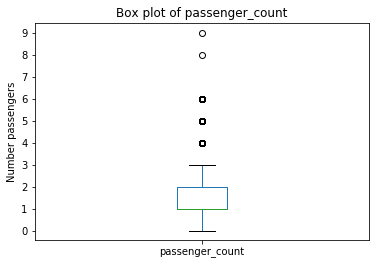

In [43]:
ax = df["passenger_count"].plot.box()
plt.ylabel("Number passengers")
plt.title("Box plot of passenger_count")
ticks = ax.set_yticks(range(10))